# **Assignment 2 - Computational Mathematics**
by sabina abdikhalikova SE-2320

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import cmath

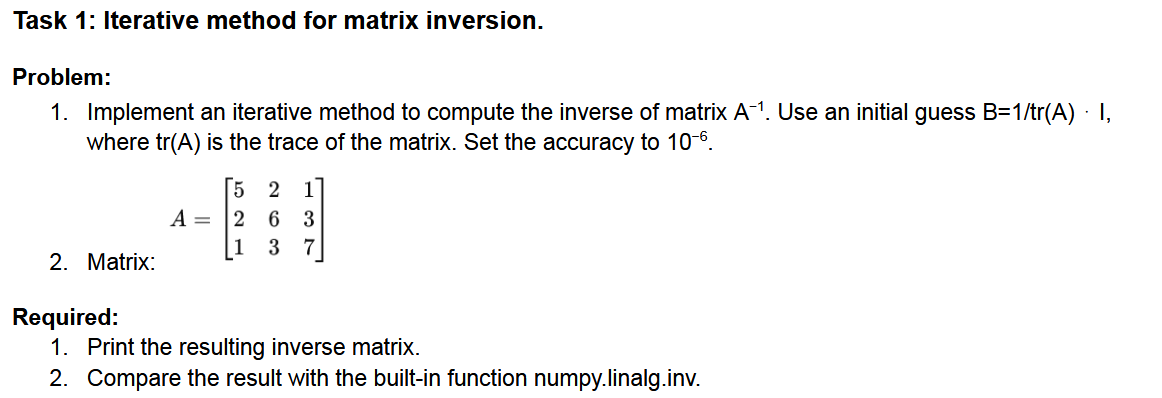

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import cmath

In [5]:
def iterative_inverse(A, B, tol, max_iter):
    """Iterative method for finding the inverse matrix."""
    n = A.shape[0]
    I = np.eye(n)  # Identity matrix
    for _ in range(max_iter):
        E = np.dot(A, B) - I  # Calculating the error
        B_new = B - np.dot(B, E)  # Proximity update
        # Checking if we have achieved accuracy
        if np.linalg.norm(E, ord='fro') < tol:
            return B_new
        B = B_new
    return B_new

# Given matrix
A = np.array([[5, 2, 1],
              [2, 6, 3],
              [1, 3, 7]], dtype=float)

# Initial approximation
trace_A = np.trace(A)
B = (1 / trace_A) * np.eye(A.shape[0])

# Iterative process
A_inv_iterative = iterative_inverse(A, B, tol=1e-6, max_iter=100)

# Using numpy's built-in function for comparison
A_inv_numpy = np.linalg.inv(A)

# Printing results
print("Inverse matrix (iterative method):")
print(A_inv_iterative)

print("\nInverse matrix (numpy.linalg.inv):")
print(A_inv_numpy)

# Checking the difference
print("\nDifference between iterative and numpy results:")
print(np.abs(A_inv_iterative - A_inv_numpy))


Inverse matrix (iterative method):
[[ 2.30769231e-01 -7.69230769e-02 -3.16344860e-18]
 [-7.69230769e-02  2.37762238e-01 -9.09090909e-02]
 [-1.52347443e-21 -9.09090909e-02  1.81818182e-01]]

Inverse matrix (numpy.linalg.inv):
[[ 0.23076923 -0.07692308  0.        ]
 [-0.07692308  0.23776224 -0.09090909]
 [ 0.         -0.09090909  0.18181818]]

Difference between iterative and numpy results:
[[0.00000000e+00 0.00000000e+00 3.16344860e-18]
 [1.38777878e-17 2.77555756e-17 0.00000000e+00]
 [1.52347443e-21 1.38777878e-17 0.00000000e+00]]


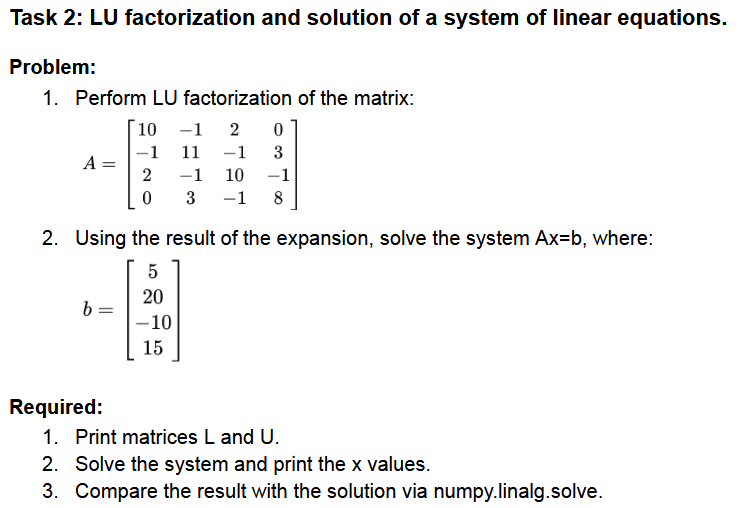

In [7]:
def lu_factorization(A):
    """LU factorization of a matrix."""
    n = A.shape[0]
    L = np.eye(n)  # Lower triangular matrix
    U = A.copy()  # Upper triangular matrix

    for i in range(n):
        for j in range(i+1, n):
            factor = U[j, i] / U[i, i]
            L[j, i] = factor
            U[j, i:] -= factor * U[i, i:]

    return L, U

def solve_lu(L, U, b):
    """Solving the system using LU decomposition."""
    # Straight move for Ly = b
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])

    # Reverse move for Ux = y
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

# Example of a matrix and right-hand side
A = np.array([[10, -1, 2, 0],
              [-1, 11, -1, 3],
              [2, -1, 10, -1],
              [0, 3, -1, 8]], dtype=float)
b = np.array([5, 20, -10, 15], dtype=float)

# LU-factorization
L, U = lu_factorization(A)
print("Lower triangular matrix L:")
print(L)
print("Upper triangular matrix U:")
print(U)

# Solution of the system
x = solve_lu(L, U, b)
print("Solution of Ax = b:")
print(x)

# Check
check = np.dot(A, x)
print("Check: A * x ≈ b")
print(check)

Lower triangular matrix L:
[[ 1.          0.          0.          0.        ]
 [-0.1         1.          0.          0.        ]
 [ 0.2        -0.0733945   1.          0.        ]
 [ 0.          0.27522936 -0.08173077  1.        ]]
Upper triangular matrix U:
[[ 1.00000000e+01 -1.00000000e+00  2.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.09000000e+01 -8.00000000e-01  3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.54128440e+00 -7.79816514e-01]
 [ 0.00000000e+00 -4.44089210e-16  0.00000000e+00  7.11057692e+00]]
Solution of Ax = b:
[ 0.82758621  1.48275862 -0.89655172  1.20689655]
Check: A * x ≈ b
[  5.  20. -10.  15.]


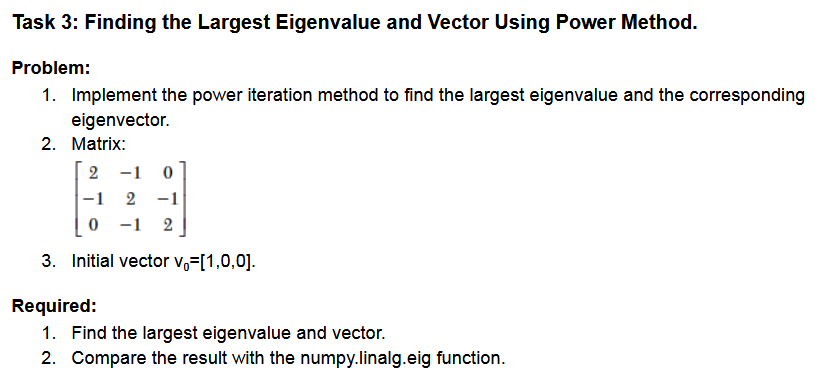

In [9]:
def power_method(A, v0, tol=1e-6, max_iter=100):
    """Power iteration method to find the largest eigenvalue and eigenvector."""
    v = v0 / np.linalg.norm(v0)  # Normalize the initial vector
    lambda_old = 0
    for _ in range(max_iter):
        # Matrix-vector multiplication
        w = np.dot(A, v)
        # Approximate eigenvalue
        lambda_new = np.dot(v, w)
        # Normalize the vector
        v_new = w / np.linalg.norm(w)
        
        # Check for convergence
        if np.abs(lambda_new - lambda_old) < tol:
            return lambda_new, v_new
        
        v = v_new
        lambda_old = lambda_new
    
    return lambda_new, v_new

# Matrix A and initial vector v0
A = np.array([[2, -1, 0], 
              [-1, 2, -1], 
              [0, -1, 2]], dtype=float)
v0 = np.array([1, 0, 0], dtype=float)

# Using the power method
lambda_max, eigenvector = power_method(A, v0, tol=1e-6, max_iter=100)

# Compare with numpy.linalg.eig
eigvals, eigvecs = np.linalg.eig(A)
largest_eigval = eigvals[np.argmax(np.abs(eigvals))]
corresponding_eigvec = eigvecs[:, np.argmax(np.abs(eigvals))]

# Output results
print("Power Method Results:")
print("Largest eigenvalue:", lambda_max)
print("Corresponding eigenvector:", eigenvector)

print("\nNumpy Results:")
print("Largest eigenvalue:", largest_eigval)
print("Corresponding eigenvector:", corresponding_eigvec)


Power Method Results:
Largest eigenvalue: 3.414213257777039
Corresponding eigenvector: [ 0.50019221 -0.70710676  0.49980775]

Numpy Results:
Largest eigenvalue: 3.4142135623730914
Corresponding eigenvector: [-0.5         0.70710678 -0.5       ]


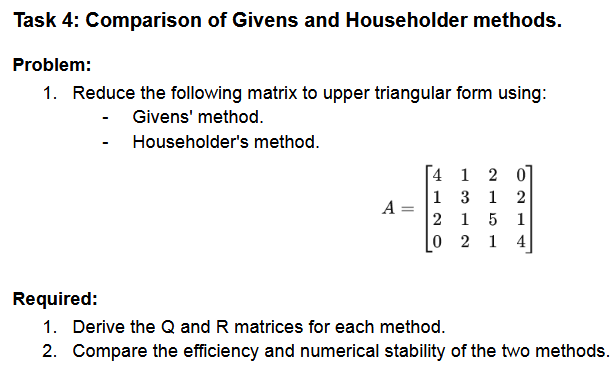

In [10]:
# Givens Rotation Method
def givens_rotation(A):
    """QR decomposition by Givens method."""
    m, n = A.shape
    Q = np.eye(m)  # Orthogonal matrix
    R = A.copy()

    for i in range(n):
        for j in range(i+1, m):
            if R[j, i] != 0:
                r = np.hypot(R[i, i], R[j, i])
                cos = R[i, i] / r
                sin = -R[j, i] / r

                G = np.eye(m)  # Givens rotation matrix
                G[i, i] = cos
                G[j, j] = cos
                G[i, j] = -sin
                G[j, i] = sin

                R = G @ R  # Transform R
                Q = Q @ G.T  # Accumulation of Q

    return Q, R

# Householder Method
def householder_qr(A):
    """QR decomposition by Householder method."""
    m, n = A.shape
    R = A.copy()
    Q = np.eye(m)

    for i in range(n):
        # Create a Householder vector
        x = R[i:, i]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x)
        v = x - e
        v = v / np.linalg.norm(v)

        # Householder Matrix
        H = np.eye(m)
        H[i:, i:] -= 2.0 * np.outer(v, v)

        # Transformation of R and accumulation of Q
        R = H @ R
        Q = Q @ H.T

    return Q, R

# Input Matrix
A = np.array([[4, 1, 2, 0],
              [1, 3, 1, 2],
              [2, 1, 5, 1],
              [0, 2, 1, 4]], dtype=float)

# Givens QR Decomposition
Q_givens, R_givens = givens_rotation(A)
print("Givens QR Decomposition:")
print("Matrix Q:")
print(Q_givens)
print("Matrix R:")
print(R_givens)
print("Check: A ≈ QR")
print(Q_givens @ R_givens)

# Householder QR Decomposition
Q_householder, R_householder = householder_qr(A)
print("\nHouseholder QR Decomposition:")
print("Matrix Q:")
print(Q_householder)
print("Matrix R:")
print(R_householder)
print("Check: A ≈ QR")
print(Q_householder @ R_householder)


Givens QR Decomposition:
Matrix Q:
[[ 0.87287156 -0.21398025 -0.38840075  0.203599  ]
 [ 0.21821789  0.77032889 -0.22505464 -0.55527   ]
 [ 0.43643578  0.04279605  0.88932881 -0.129563  ]
 [ 0.          0.59914469  0.08711792  0.79588699]]
Matrix R:
[[ 4.58257569e+00  1.96396101e+00  4.14613991e+00  8.72871561e-01]
 [ 0.00000000e+00  3.33809184e+00  1.15549333e+00  3.98003258e+00]
 [ 0.00000000e+00  7.88612447e-18  3.53190586e+00  7.87691234e-01]
 [ 0.00000000e+00 -8.63216513e-19  1.05737923e-17  1.94344499e+00]]
Check: A ≈ QR
[[4.00000000e+00 1.00000000e+00 2.00000000e+00 1.19997122e-16]
 [1.00000000e+00 3.00000000e+00 1.00000000e+00 2.00000000e+00]
 [2.00000000e+00 1.00000000e+00 5.00000000e+00 1.00000000e+00]
 [0.00000000e+00 2.00000000e+00 1.00000000e+00 4.00000000e+00]]

Householder QR Decomposition:
Matrix Q:
[[ 0.87287156 -0.21398025 -0.38840075  0.203599  ]
 [ 0.21821789  0.77032889 -0.22505464 -0.55527   ]
 [ 0.43643578  0.04279605  0.88932881 -0.129563  ]
 [ 0.          0.599

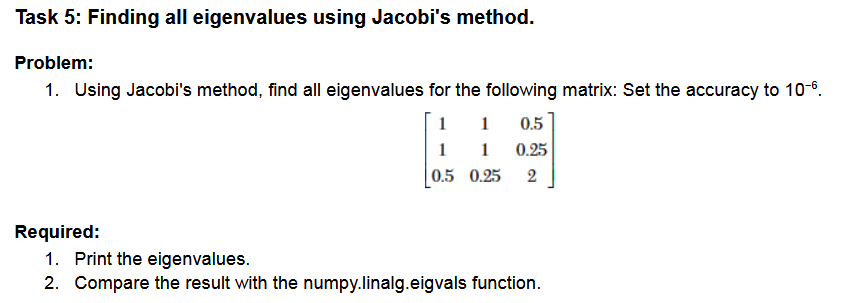

In [11]:
def jacobi_eigenvalues(A, tol, max_iter):
    """Jacobi's method for finding all eigenvalues."""
    n = A.shape[0]
    V = np.eye(n)
    for _ in range(max_iter):
        # Find the maximum off-diagonal element
        max_val = 0
        for i in range(n):
            for j in range(i + 1, n):
                if abs(A[i, j]) > abs(max_val):
                    max_val = A[i, j]
                    p, q = i, j

        if abs(max_val) < tol:
            break

        # Calculating rotation parameters
        theta = 0.5 * np.arctan2(2 * A[p, q], (A[p, p] - A[q, q]))
        cos = np.cos(theta)
        sin = np.sin(theta)

        # Apply the Jacobi transformation
        R = np.eye(n)
        R[p, p] = R[q, q] = cos
        R[p, q] = sin
        R[q, p] = -sin

        # Update matrix A and eigenvector matrix V
        A = R.T @ A @ R
        V = V @ R

    eigenvalues = np.diag(A)
    return eigenvalues, V

# Define the given matrix A
A = np.array([[1, 1, 0.5],
              [1, 1, 0.25],
              [0.5, 0.25, 2]], dtype=float)

# Set the accuracy and maximum iterations
tol = 1e-6
max_iter = 100

# Find eigenvalues and eigenvectors using the Jacobi method
eigenvalues_jacobi, eigenvectors_jacobi = jacobi_eigenvalues(A.copy(), tol, max_iter)

# Find eigenvalues using numpy's built-in function
eigenvalues_numpy = np.linalg.eigvals(A)

# Print results
print("Eigenvalues (Jacobi's method):", eigenvalues_jacobi)
print("Eigenvalues (NumPy):", eigenvalues_numpy)


Eigenvalues (Jacobi's method): [1.92916912 1.48015913 0.59067175]
Eigenvalues (NumPy): [-0.01664728  2.53652586  1.48012142]
